In [ ]:
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler , MaxAbsScaler

# First do train test split on data
# Apply trans of train data then in the end apply it on test

#FEATURE TRANSFORMATION
✅ Feature Transformation (in Machine Learning):
Feature Transformation is the process of modifying features to improve the performance of machine learning models.

It helps in:

 - Making data more linear

- Handling non-normal distributions

- Reducing skewness

- Stabilizing variance

- Making relationships more visible to algorithms


Feature Trans includes feature Scaling , Feature Encoding


`These scaling techniques are not fixes you have to try every scaling and find out which works better , you can decide which would work better by just seeing data , machine learning is all about experimenting`

- Feature scaling is the last step we do in ml pipeline : do before just giving data to our ml algo

-  Feature scaling means adjusting the values of features to a common scale usually so that they fall within a specific range like 0 to 1 or have a mean of 0 and standard deviation of 1.

# FEATURE SCALING TEACHNIQUES
- Normalization
- Standardization


# STANDARDIZATION

- X` = X- (Mean of X) / Std of X
- Shape of graph does not chnages , only scale of graph changes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [ ]:

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic numerical data
rows = 150

data = {
    'age': np.random.randint(18, 70, size=rows),
    'salary': np.random.randint(30000, 120000, size=rows),
    'experience': np.random.randint(0, 40, size=rows),
    'score': np.random.uniform(0, 100, size=rows),
    'purchases': np.random.randint(0, 2, size=rows)  # Binary target
}

df = pd.DataFrame(data)


In [ ]:
from sklearn.model_selection import train_test_split
x =  df.iloc[:,0:4]
y = df.iloc[:,-1]
x_train , x_test , y_train ,  y_test = train_test_split( x,y, test_size=0.2,random_state = 13 )



In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)   # Learn the scaling parameters from the training set and store it  , if not use and use direct transform : error happend

x_train_scaled = scalar.transform(x_train) # Apply scaling to the training se
x_test_scaled = scalar.transform(x_test) # Apply same scaling to test set



# This applies standardization (feature scaling) to your training and test data using the StandardScaler that you already fitted on x_train.
print("Mean of features:", scalar.mean_)
print("Standard deviation of features:", scalar.scale_)

Mean of features: [4.31500000e+01 7.64784500e+04 2.09583333e+01 5.02785729e+01]
Standard deviation of features: [1.51622613e+01 2.64276816e+04 1.11940429e+01 3.06295957e+01]


In [ ]:
data = pd.DataFrame(x_train_scaled ,columns =  np.array(df.columns)[:4])
np.round(data.describe())

,age,salary,experience,score
count,120.0,120.0,120.0,120.0
mean,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0
50%,-0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0
max,2.0,2.0,2.0,2.0


# NORMALIZATION

- It is always a good idea when scaling the data to elimenate their units as they can create problem when applying the ml algo

## Types
- 1- Min max Scaling

- 2- Max Absolute Scaling

- 3- Robust Scaling

- 4- Mean Normalization

#`MIN - MAX SCALING`
 - x-(Min of data) / (Max of data - Min of data) [0 , 1 ]


In [ ]:

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic numerical data
rows = 150

data = {
    'age': np.random.randint(18, 70, size=rows),
    'salary': np.random.randint(30000, 120000, size=rows),
    'experience': np.random.randint(0, 40, size=rows),
    'score': np.random.uniform(0, 100, size=rows),
    'purchases': np.random.randint(0, 2, size=rows)  # Binary target
}

df = pd.DataFrame(data)

from sklearn.model_selection import train_test_split
x =  df.iloc[:,0:4]
y = df.iloc[:,-1]
x_train , x_test , y_train ,  y_test = train_test_split( x,y, test_size=0.2,random_state = 13 )



In [ ]:
from sklearn.preprocessing import MinMaxScaler
mc  = MinMaxScaler()
mc.fit(x_train)
dta1 = mc.transform(x_train)
dta2 = mc.transform(x_test)
pd.DataFrame(dta1 , columns = np.array(df.columns)[:4])

,age,salary,experience,score
0,0.666667,0.325906,0.923077,0.975907
1,0.803922,0.173646,0.461538,0.684401
2,0.509804,0.846440,0.102564,0.085127
3,0.901961,0.595342,0.692308,0.451778
4,0.490196,0.916476,0.384615,0.275041
...,...,...,...,...
115,0.647059,0.812027,1.000000,0.873371
116,0.549020,0.030302,0.820513,0.071794
117,0.039216,0.913295,0.282051,0.585401
118,0.333333,0.711655,0.589744,0.445572


# MEAN NORMALIZATION

- Mean Normalization scales the features so that their mean becomes 0, and the values are typically in the range [-1, 1].
- Mean Centring
-   x-(Mean of data) / (Max of data - Min of data)
-  Not use that much
- Sklearn dont have fun of it
-  Used where algo needs mean centric data

# MAX ABSOLUTE SCALING
- X / | Absolute max value of data set |
- Keeps the sign of the data (positive/negative)

- Scales without shifting (no centering)

- Suitable for sparse data (like text data or one-hot encoded features)

-  Sparse data : gs data ma 0 boht zaida hon


- ✅ `Use fit_transform() . Works for all trans , when:
 You're working with training data`

- You want concise code

- `❗ Use fit() + transform() separately when:
You want to reuse the same fitted scaler on other datasets (like test data)`

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
mxc =  MaxAbsScaler()
mxc.fit(x_train)
mxc.transform(x_train)
# or
mxc.fit_transform(x_train)


# They both are same thing

# ROBUST SCALING
- Robust Scaling is a feature scaling technique that uses the median and interquartile range (IQR) instead of the mean and standard deviation

- Less sensitive to outliers (because it ignores extreme values)

- Keeps the center around 0

- Ideal for data with outliers or skewed distributions

- x - ( Median of x) / IQR  
-  IQR = Q3(75th Percentile)-Q1(25th Percentile)

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit_transform(x_train)

#NORMALIZATON VS STANDARDIZATION

1 - IS Feature scaling REQUIRED? Ask que by your self, you will know it by knowing more ml algo

2 - If using Featur scaling what to use ? standardization or scaling

3- Most of the problems are used by Standardization
4 - Normalization : Min , Max scaling is used when min , max of data is known example  Image processing (CNN)

# FEATURE ENCODING

They are many encoding techniques to encode strings as ml algos expect numbers to compute

To encode ordinal data we have technique called Ordinal encoding

- Oridnal categorical data means the categorical data in which order matters like shirt size LARGE MEDIUM SMALL , EXCELLENT GOOD BAD



#ORIDNAL ENCODING

- We use this technique if our input  column is ordinal categorical


#Label Encoding

- We use this technique if our target column is ordinal categorical

`ORDINAL ENCODING`

Convert categorical data with a natural order (like Low < Medium < High) into numerical values so models can use them.

- ✅ Example:
- Say you have a column:
- Performance = ['Low', 'Medium', 'High']

⚙️ Ordinal Encoding Logic:

Behind the scenes, it:

- Recognizes the order (you must define it if not obvious).

- Assigns integers in increasing order:

 -   Low → 0

 - Medium → 1

 - High → 2

Now,
   - ['Low', 'Medium', 'High'] becomes [0, 1, 2]

In [ ]:

data = {
    'Education Level': ['High School', 'Bachelor', 'Master', 'High School', 'Bachelor',
                        'Master', 'Bachelor', 'High School', 'Master', 'Bachelor'],
    'Performance': ['Low', 'Medium', 'High', 'Low', 'Medium',
                    'High', 'High', 'Medium', 'Medium', 'Low'],
    'Experience Level': ['Beginner', 'Intermediate', 'Advanced', 'Beginner', 'Intermediate',
                         'Advanced', 'Intermediate', 'Beginner', 'Advanced', 'Beginner'],
    'Promotion Status': ['Not Promoted', 'Not Promoted', 'Promoted', 'Not Promoted', 'Promoted',
                         'Promoted', 'Promoted', 'Not Promoted', 'Promoted', 'Not Promoted']
}

df = pd.DataFrame(data)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(df.iloc[:,:3] , df.iloc[:,-1] , random_state = 3 , test_size = 0.2)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
df.value_counts()
# categorical should be pass in priroty order else it will be in any level order
oe = OrdinalEncoder(categories = [['Master' ,'Bachelor','High School' ] , ['High','Medium','Low'] , ['Advanced' ,'Intermediate' ,'Beginner']])

In [ ]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Master', 'Bachelor', 'High School'],
                           ['High', 'Medium', 'Low'],
                           ['Advanced', 'Intermediate', 'Beginner']])

In [ ]:
x_train = oe.transform(x_train)

In [ ]:
x_test =  oe.transform(x_test)

In [ ]:
pd.DataFrame(x_train , columns = df.columns[:3]) # ordinally encoded

,Education Level,Performance,Experience Level
0,1.0,1.0,1.0
1,0.0,0.0,0.0
2,1.0,2.0,2.0
3,1.0,0.0,1.0
4,2.0,1.0,2.0
5,2.0,2.0,2.0
6,2.0,2.0,2.0
7,0.0,1.0,0.0


In [ ]:
oe.categories

[['Master', 'Bachelor', 'High School'],
 ['High', 'Medium', 'Low'],
 ['Advanced', 'Intermediate', 'Beginner']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y_train)

LabelEncoder()

In [ ]:
le.transform(y_train)

In [ ]:
le.transform(y_test)

array([1, 1])

`ONE HOT ENCODING`

`# WHY NOT LABEL ENCODING OR ORDINAL ENCODING FOR NOMIAL DATA?`

 - Issue is in case of  ordinal data there is a importance and order , which is not present in nominal data , if we assign the number like 1 2 3 4 etc to data which is nominal like :
   - Yellow = 1
   - Green = 2
   - Black = 3
- Our ml algo will think as it is these are order by importance or order , but in reality they dont have any order or importance ,yellow , green , black are of same order

 # WORKING OF ONE HOT ENCODING
Categorical Values → Binary Columns:

#`A Column is form for each category`

   - Each unique category gets its own binary column (with a 0 or 1 value).
   - This new column is called dummy variable
   - If there are 50 categories , then 50 new col would be created for each
  indiviual category
`!Active Column:`

 - In One-Hot Encoding, for each row, only one column is "active" (set to 1), and all others are set to 0.

#`No Implicit Order:`

 - This technique is used for categorical data where there is no intrinsic order between categories (like colors, cities, or types).

#`Result`:

 - The encoding represents each category as a binary vector, where each vector is of the same length (equal to the number of unique categories).



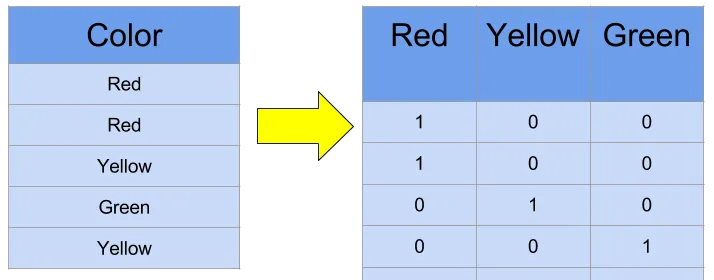

- In machine learning the  input columns should should not have any Mathmatical realtion among each other , means they are not depend on each other except the Output column which is dependent column

- This Mathematical relation is multicolinearity
- This multicolinearity creates issues in linear models like linear regression , logistic regression
- The formation of new col / dummy variable creates multicolinearity issues
to avoid it we drop one column , if we have n dummy varible columns , so we remove one columns from it (n-1) new col , these n-1 columns represent all n columns
- This issue of multicolinearity created by these dummy var is called`dummy variable trap`

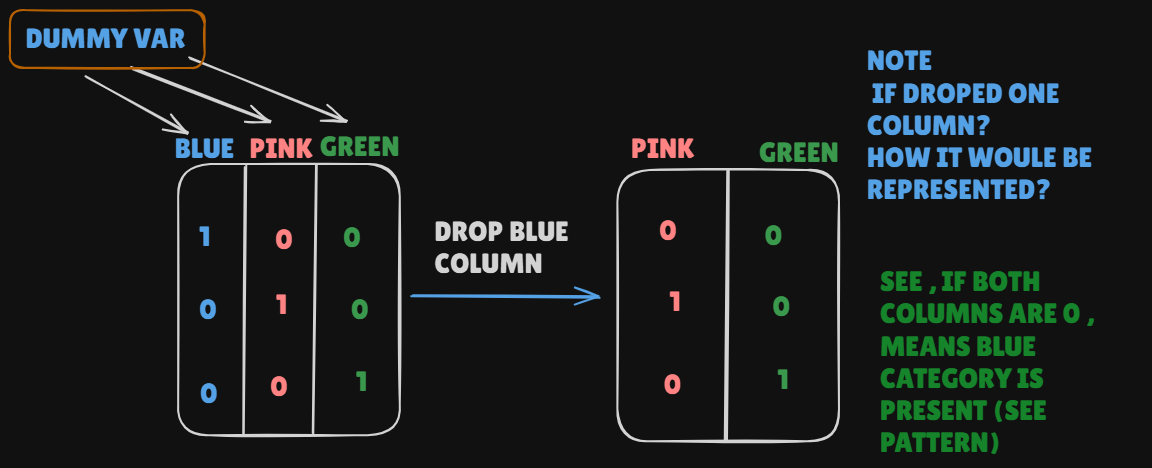

# ` WHAT IF WE HAVE MANY CATEGORICAL NOMINAL DATA IN ONE COL`

when you're working with One-Hot Encoding on datasets with frequent categorical variables, you may encounter some challenges, such as:

`High Cardinality`:

- When you have a large number of categories, it can lead to many dummy variables.

`Sparse Data`:
-  If you have many categories with few occurrences, you may end up with sparse matrices (lots of zeros).

`Memory Consumption`:
-  More categories can result in larger datasets and higher memory usage.

If your dataset has many categories (e.g., many product categories), the number of dummy variables can grow quickly.

Options to Manage High Cardinality:
-  # Limit Categories (Frequency Encoding):

 - If a category appears rarely, you can group small categories together under a single category (e.g., "Other").

 - You can use frequency encoding to convert categories into numerical values based on how often they appear in the dataset.

- # Use of Top N Categories:

 - Instead of including every possible category, you could choose only the Top N most frequent categories and treat the rest as a catch-all category ("Other").

- # Use Hashing (Hashing Trick):

 - If the cardinality is really high, you can apply a technique called feature hashing. It hashes categories into a fixed number of buckets, reducing the dimensionality.

In [ ]:
data = {
    'CustomerID': list(range(301, 321)),
    'Product': [
        'Smartphone', 'Laptop', 'Tablet', 'Smartwatch', 'Smartphone',
        'Camera', 'Headphones', 'Smartphone', 'Gaming Console', 'Smartphone',
        'Printer', 'Monitor', 'Smartphone', 'Laptop', 'Smartphone',
        'Router', 'Smartphone', 'Projector', 'Smartphone', 'Smartphone'
    ],
    'Region': [
        'Asia', 'Europe', 'Asia', 'North America', 'Europe',
        'Europe', 'Asia', 'North America', 'Europe', 'Asia',
        'North America', 'Asia', 'Europe', 'Asia', 'North America',
        'Europe', 'Asia', 'North America', 'Asia', 'Europe'
    ],
    'Customer Type': [
        'New', 'Returning', 'New', 'Returning', 'New',
        'New', 'Returning', 'New', 'Returning', 'New',
        'Returning', 'New', 'Returning', 'New', 'Returning',
        'New', 'Returning', 'New', 'Returning', 'New'
    ],
    'Purchase Method': [
        'Online', 'Store', 'Online', 'Store', 'Online',
        'Store', 'Online', 'Store', 'Online', 'Store',
        'Online', 'Store', 'Online', 'Store', 'Online',
        'Store', 'Online', 'Store', 'Online', 'Store'
    ],
    'Satisfaction': [
        'Satisfied', 'Neutral', 'Unsatisfied', 'Satisfied', 'Neutral',
        'Unsatisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Satisfied',
        'Neutral', 'Unsatisfied', 'Satisfied', 'Neutral', 'Unsatisfied',
        'Satisfied', 'Neutral', 'Unsatisfied', 'Satisfied', 'Neutral'
    ]
}

df = pd.DataFrame(data)

In [ ]:
df

,CustomerID,Product,Region,Customer Type,Purchase Method,Satisfaction
0,301,Smartphone,Asia,New,Online,Satisfied
1,302,Laptop,Europe,Returning,Store,Neutral
2,303,Tablet,Asia,New,Online,Unsatisfied
3,304,Smartwatch,North America,Returning,Store,Satisfied
4,305,Smartphone,Europe,New,Online,Neutral
5,306,Camera,Europe,New,Store,Unsatisfied
6,307,Headphones,Asia,Returning,Online,Satisfied
7,308,Smartphone,North America,New,Store,Neutral
8,309,Gaming Console,Europe,Returning,Online,Unsatisfied
9,310,Smartphone,Asia,New,Store,Satisfied


In [ ]:
#hot encoding using pandas
# Product is categorical but issue is it is frequent ordinal means many categories are reprating frequenlty ,so we will deal it sepratly
pd.get_dummies(df ,columns = ['Region',	'Customer Type'	,'Purchase Method'	] )

# First column is not dropped to resolve multicolinearity , to do this use paramter drop_first = True

#  7 created new columns : 7 categories hen total gbh : region customer type , purchase method ma

,CustomerID,Product,Satisfaction,Region_Asia,Region_Europe,Region_North America,Customer Type_New,Customer Type_Returning,Purchase Method_Online,Purchase Method_Store
0,301,Smartphone,Satisfied,True,False,False,True,False,True,False
1,302,Laptop,Neutral,False,True,False,False,True,False,True
2,303,Tablet,Unsatisfied,True,False,False,True,False,True,False
3,304,Smartwatch,Satisfied,False,False,True,False,True,False,True
4,305,Smartphone,Neutral,False,True,False,True,False,True,False
5,306,Camera,Unsatisfied,False,True,False,True,False,False,True
6,307,Headphones,Satisfied,True,False,False,False,True,True,False
7,308,Smartphone,Neutral,False,False,True,True,False,False,True
8,309,Gaming Console,Unsatisfied,False,True,False,False,True,True,False
9,310,Smartphone,Satisfied,True,False,False,True,False,False,True


In [ ]:
pd.get_dummies(df ,columns = ['Region',	'Customer Type'	,'Purchase Method'	] , drop_first = True)
# oNE COL DROPED OF DUMMY VAR FOR EACH CATEORY(IF CAEGORY ARE MORE THAN 2 , THEN 1 OF EACH IS DROPPED)

,CustomerID,Product,Satisfaction,Region_Europe,Region_North America,Customer Type_Returning,Purchase Method_Store
0,301,Smartphone,Satisfied,False,False,False,False
1,302,Laptop,Neutral,True,False,True,True
2,303,Tablet,Unsatisfied,False,False,False,False
3,304,Smartwatch,Satisfied,False,True,True,True
4,305,Smartphone,Neutral,True,False,False,False
5,306,Camera,Unsatisfied,True,False,False,True
6,307,Headphones,Satisfied,False,False,True,False
7,308,Smartphone,Neutral,False,True,False,True
8,309,Gaming Console,Unsatisfied,True,False,True,False
9,310,Smartphone,Satisfied,False,False,False,True


In [ ]:
# In doing ml projects we dont do this using pandas , we do only in analysis ,cz pandas dont remember by which number did it encodes the value


#-------------------TRAIN DATA -----------------------------

# #train = pd.DataFrame({'Color': ['Red', 'Green', 'Blue']})
# train_dummies = pd.get_dummies(train)

#   Color_Blue  Color_Green  Color_Red
# 0           0            0          1
# 1           0            1          0
# 2           1            0          0

# #-------------------TEST DATA -----------------------------

# test = pd.DataFrame({'Color': ['Red', 'Yellow']})
# test_dummies = pd.get_dummies(test)


#    Color_Red  Color_Yellow
# 0          1             0
# 1          0             1







⚠ Problem:
- The test data has a new column: Color_Yellow

- It doesn’t match the training columns

- ML models will throw an error because column names are different

✅ Why OneHotEncoder is better:

- It remembers categories from training using .fit() and always outputs consistent columns, even if a category is missing or new.

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train  , y_test =  train_test_split(df.iloc[:,2:5], df.iloc[:,5])

In [ ]:

from sklearn.preprocessing import  OneHotEncoder

ohe = OneHotEncoder(drop='first') # dropping fist col
# do sparse_output = False , if want direct sparse matrix , not using .tparray()
# by derault dtype is float , u may change it dtype = np.int32
sparse_matrix  = ohe.fit_transform(x_train[x_train.columns]).toarray()


In [ ]:
temp_df = pd.DataFrame(sparse_matrix  )


In [ ]:

new_df= pd.concat([  df.iloc[:,0:2], temp_df   ], axis = 1).dropna()

 # stack side by side : axis =1 : a b , c d after  concat along vertical axis : a b c

,CustomerID,Product,0,1,2,3
0,301,Smartphone,0.0,1.0,0.0,1.0
1,302,Laptop,0.0,1.0,1.0,1.0
2,303,Tablet,1.0,0.0,1.0,0.0
3,304,Smartwatch,1.0,0.0,0.0,0.0
4,305,Smartphone,1.0,0.0,0.0,1.0
5,306,Camera,0.0,0.0,0.0,0.0
6,307,Headphones,0.0,0.0,0.0,1.0
7,308,Smartphone,0.0,0.0,1.0,0.0
8,309,Gaming Console,0.0,0.0,0.0,1.0
9,310,Smartphone,0.0,1.0,0.0,1.0


#DEALING WITH FREQUENT CATEGORICAL DATA


In [ ]:
# USING PANDAS
data = {
    'Product': [
        'Laptop', 'Smartphone', 'Smartwatch', 'Laptop', 'Smartphone',
        'Smartwatch', 'Laptop', 'Tablet', 'Smartwatch', 'Laptop',
        'Smartphone', 'Smartwatch', 'Tablet', 'Smartphone', 'Smartwatch',
        'Laptop', 'Smartphone', 'Smartwatch', 'Laptop', 'Smartphone',
        'Smartwatch', 'Tablet', 'Tablet', 'Camera', 'Camera'
    ],
    'Color': [
        'Red', 'Black', 'Silver', 'Blue', 'Green',
        'Black', 'Red', 'Blue', 'Silver', 'Black',
        'Red', 'Silver', 'Blue', 'Green', 'Silver',
        'Red', 'Black', 'Silver', 'Blue', 'Green',
        'Silver', 'White', 'White', 'Black', 'Black'
    ],
    'Seller': [
        'Amazon', 'Flipkart', 'Snapdeal', 'Amazon', 'Snapdeal',
        'Flipkart', 'Amazon', 'Amazon', 'Snapdeal', 'Flipkart',
        'Amazon', 'Amazon', 'Snapdeal', 'Flipkart', 'Snapdeal',
        'Flipkart', 'Snapdeal', 'Amazon', 'Amazon', 'Flipkart',
        'Snapdeal', 'Amazon', 'Flipkart', 'Snapdeal', 'Amazon'
    ],
    'Location': [
        'Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Delhi',
        'Bangalore', 'Kolkata', 'Chennai', 'Mumbai', 'Delhi',
        'Kolkata', 'Bangalore', 'Chennai', 'Delhi', 'Bangalore',
        'Mumbai', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai',
        'Bangalore', 'Chennai', 'Mumbai', 'Delhi', 'Bangalore'
    ],
    'Sales': [
        550, 480, 320, 600, 490,
        310, 590, 495, 300, 610,
        505, 330, 580, 485, 340,
        620, 475, 335, 630, 500,
        345, 270, 260, 400, 410
    ]
}

df = pd.DataFrame(data)


In [ ]:
counts = df['Product'].value_counts()

In [ ]:
threshold = 4
cols = counts[counts<=threshold].index
pd.get_dummies(df['Product'].replace(cols , "Other"))# replace  rare categoreis with other

,Laptop,Other,Smartphone,Smartwatch
0,True,False,False,False
1,False,False,True,False
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
5,False,False,False,True
6,True,False,False,False
7,False,True,False,False
8,False,False,False,True
9,True,False,False,False


In [ ]:
# USING SKLEARNf
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=3)


In [ ]:
# encoder.fit_transform(df['Product'])
sprse = encoder.fit_transform(df[['Product']]).toarray()

In [ ]:
# encoder.get_feature_names_out(df['Product'])
col_names = encoder.get_feature_names_out(df['Product'])


In [ ]:
col_names

array(['Product_Laptop', 'Product_Smartphone', 'Product_Smartwatch',
       'Product_Tablet', 'Product_infrequent_sklearn'], dtype=object)

In [ ]:
# prac

import pandas as pd

# Dataset 1
data1 = pd.DataFrame({
    'Product': ['Laptop', 'Smartphone', 'Smartwatch', 'Tablet', 'Camera', 'Laptop', 'Smartphone',
                'Smartwatch', 'Speaker', 'Printer', 'Laptop', 'Smartphone', 'Camera', 'Smartwatch', 'Monitor'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South',
               'East', 'West', 'North', 'South', 'East'],
    'Sales_Channel': ['Online', 'Offline', 'Online', 'Offline', 'Online', 'Online', 'Offline',
                      'Online', 'Offline', 'Offline', 'Online', 'Offline', 'Online', 'Online', 'Offline'],
    'Units_Sold': [120, 95, 30, 25, 40, 110, 90, 35, 20, 18, 150, 85, 60, 70, 45],
    'Customer_Segment': ['Retail', 'Corporate', 'Retail', 'Corporate', 'Retail', 'Corporate', 'Retail',
                         'Corporate', 'Retail', 'Corporate', 'Retail', 'Corporate', 'Retail', 'Corporate', 'Retail']
})

df =  data1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Splitting features and target
x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:, :4], df.iloc[:, 4], test_size=0.3, random_state=2
)

# OneHotEncoder with frequency handling
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=2)
sparse = encoder.fit_transform(x_train).toarray()

# Get feature names
feature_names = encoder.get_feature_names_out(x_train.columns)

# To check everything together:
pd.DataFrame(sparse, columns=feature_names)


#COLUMN TRANSFORMER

- The issue is in every data set , there are oridnal data , categorical data , missing values.. etc , if we are applying transformation like encoding on ordinal , nominal etc by seprating each col , the work would be hectic , first we have to seprate the group apply trans , then recombine all the frames

- In order to resolve this we have column transformer

In [ ]:
data1 = pd.DataFrame({
    'Product': ['Laptop', 'Smartphone', 'Smartwatch', 'Tablet', 'Camera', 'Laptop', 'Smartphone',
                'Smartwatch', 'Speaker', 'Printer', 'Laptop', 'Smartphone', 'Camera', 'Smartwatch', 'Monitor'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South',
               'East', 'West', 'North', 'South', 'East'],
    'Sales_Channel': ['Online', 'Offline', 'Online', 'Offline', 'Online', 'Online', 'Offline',
                      'Online', 'Offline', 'Offline', 'Online', 'Offline', 'Online', 'Online', 'Offline'],
    'Units_Sold': [120, 95, 30, 25, 40, 110, 90, 35, 20, 18, 150, 85, 60, 70, 45],
    'Customer_Segment': ['Retail', 'Corporate', 'Retail', 'Corporate', 'Retail', 'Corporate', 'Retail',
                         'Corporate', 'Retail', 'Corporate', 'Retail', 'Corporate', 'Retail', 'Corporate', 'Retail']
})

df =  data1

In [ ]:
from sklearn.compose import ColumnTransformer
x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:, :4], df.iloc[:, 4], test_size=0.3, random_state=2
)

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False), ['Region']),
    ('tnf2', OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=3, sparse_output=False), ['Product']),
    ('tnf3', OneHotEncoder(sparse_output=False), ['Sales_Channel'])
], remainder='passthrough')

In [ ]:
sprse  = transformer.fit_transform(x_train)

In [ ]:
cols = transformer.get_feature_names_out()
pd.DataFrame(sprse, columns=cols)


,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Product_Smartwatch,tnf2__Product_infrequent_sklearn,tnf3__Sales_Channel_Offline,tnf3__Sales_Channel_Online,remainder__Units_Sold
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,25.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,95.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,150.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,35.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,60.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,30.0
6,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,90.0
7,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,45.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,70.0
9,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0


#**BINNING AND BINARIZATION**

#**Discretization in machine learning:**
- It means converting continuous data into discrete buckets or categories.

- You take something that could have infinite possible values (like height, temperature, etc.) and split it into finite groups.

- Discretization is the overall process.

#BINNING
- Binning is one specific method of discretization.

- It creates equal-width bins (or sometimes equal-frequency bins) to group
 values.
- Encoding numerical data , as sometimes treating numerical data as categorical make more sense or help us to deal it easily
- Grouping continuous numerical values into fixed ranges (called "bins").

- Instead of keeping every tiny difference, you say, "This value falls into Bin 1, that value falls into Bin 2," and so on.

- Purpose: Reduce noise, simplify the model, or handle non-linear relationships.

Example:
- Ages = [5, 12, 19, 24, 35, 42]
- You can bin them like:

- 0–18 → Bin 1 (Child)

- 19–35 → Bin 2 (Young Adult)

- 36+ → Bin 3 (Adult)

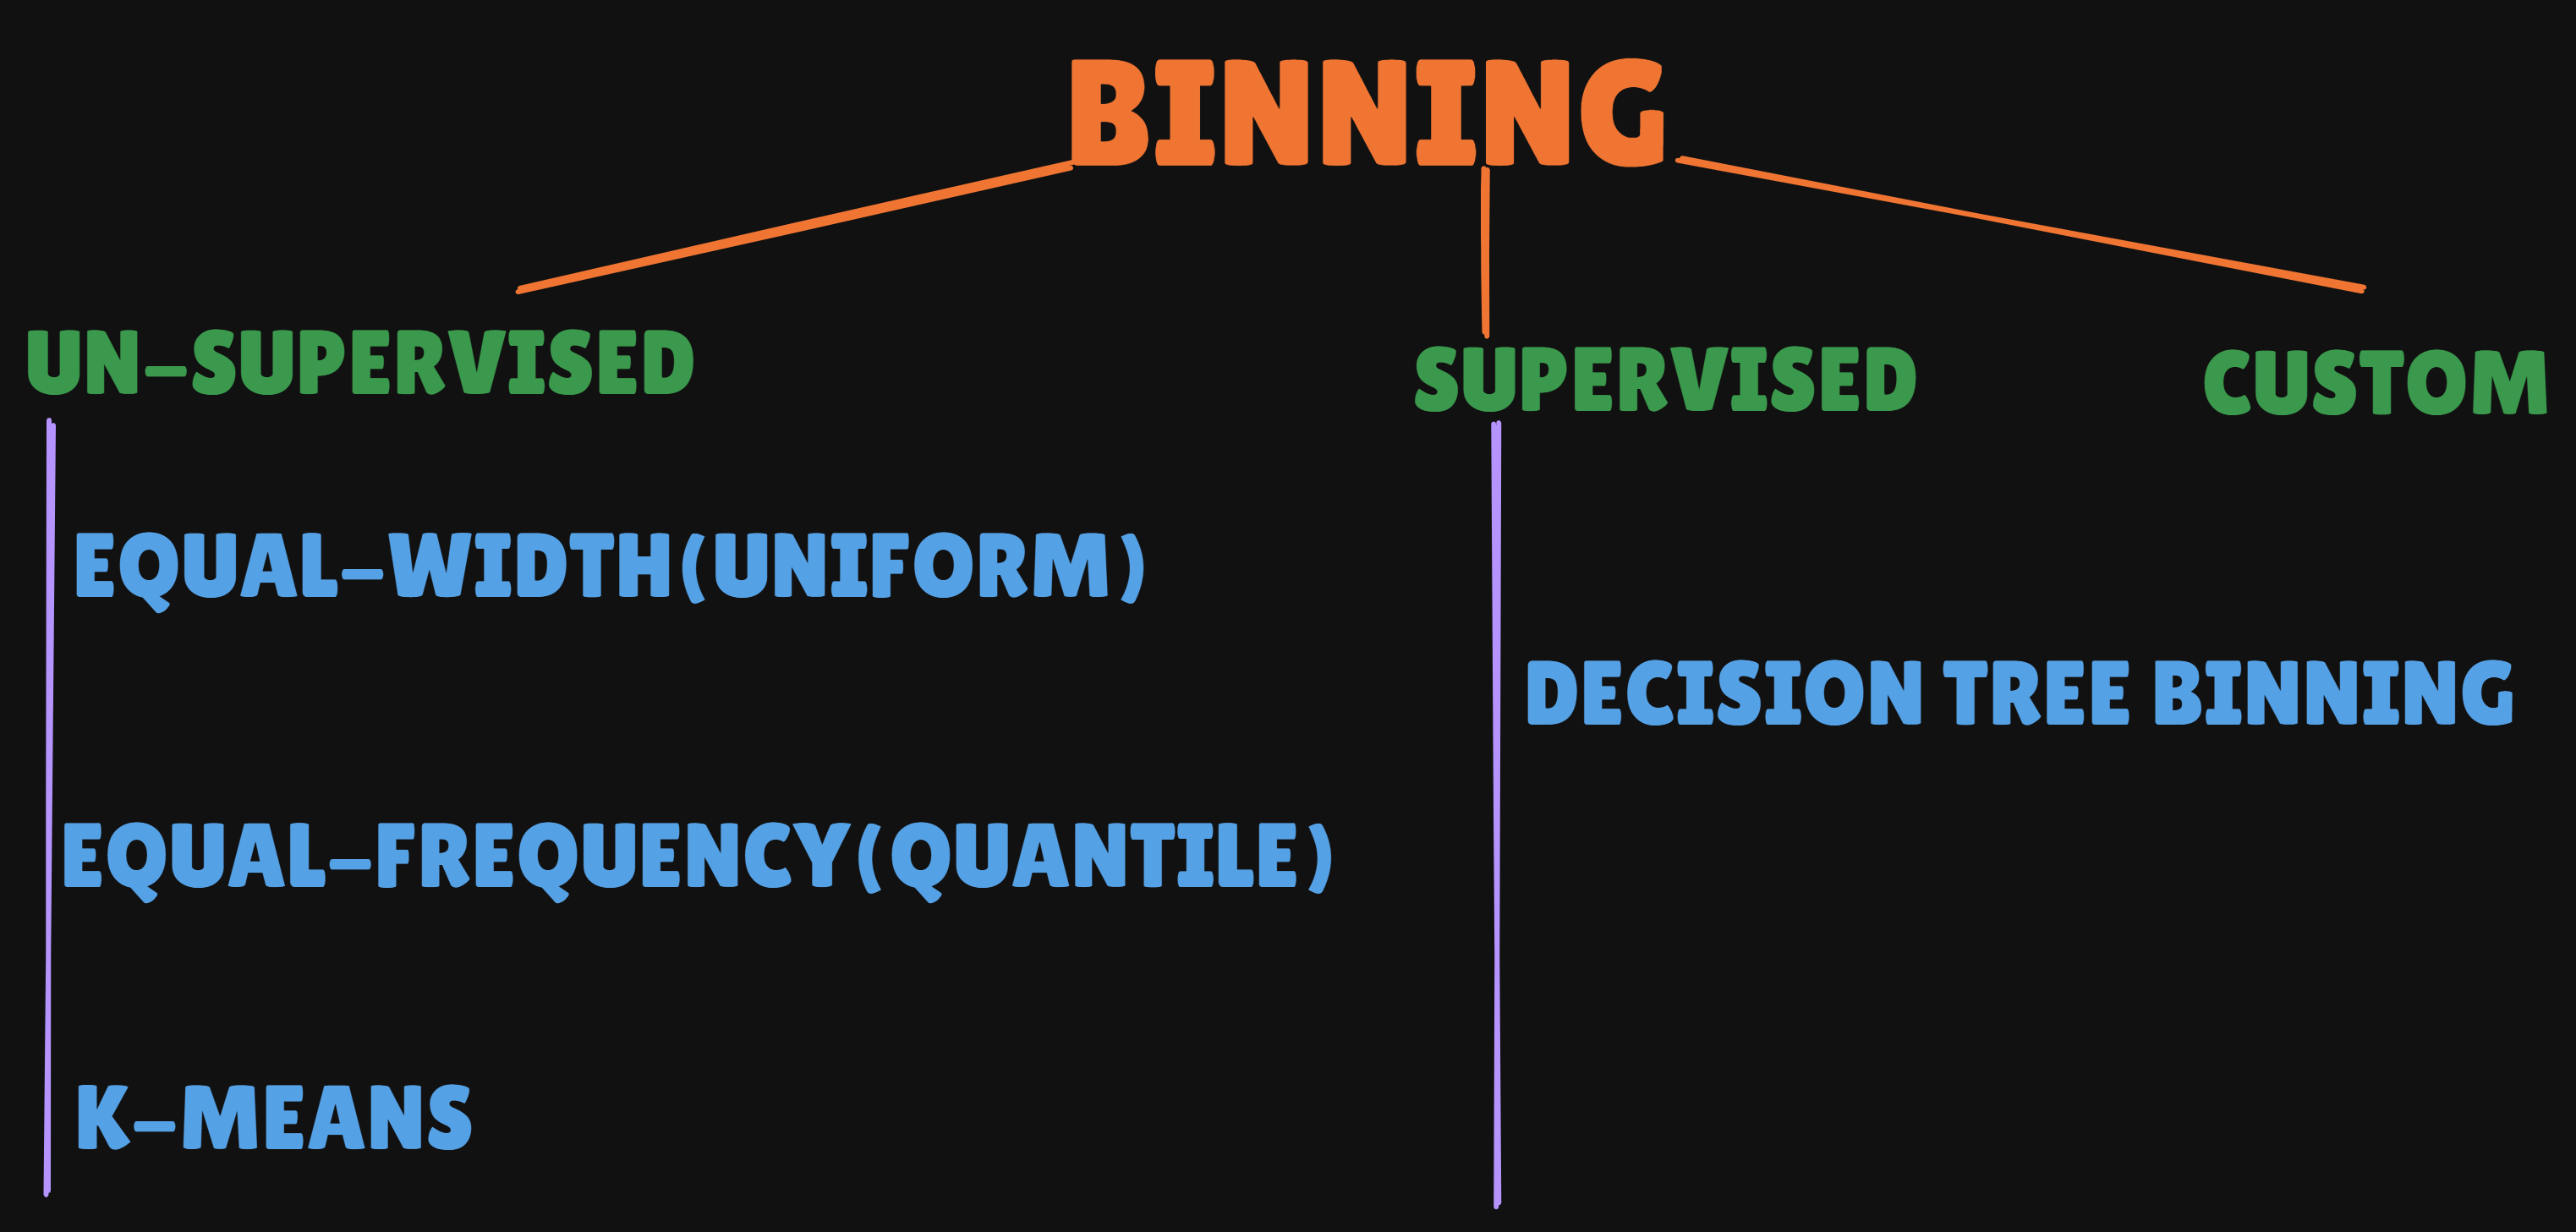

#**EQUAL-WIDTH (UNIFROM BINNING)**

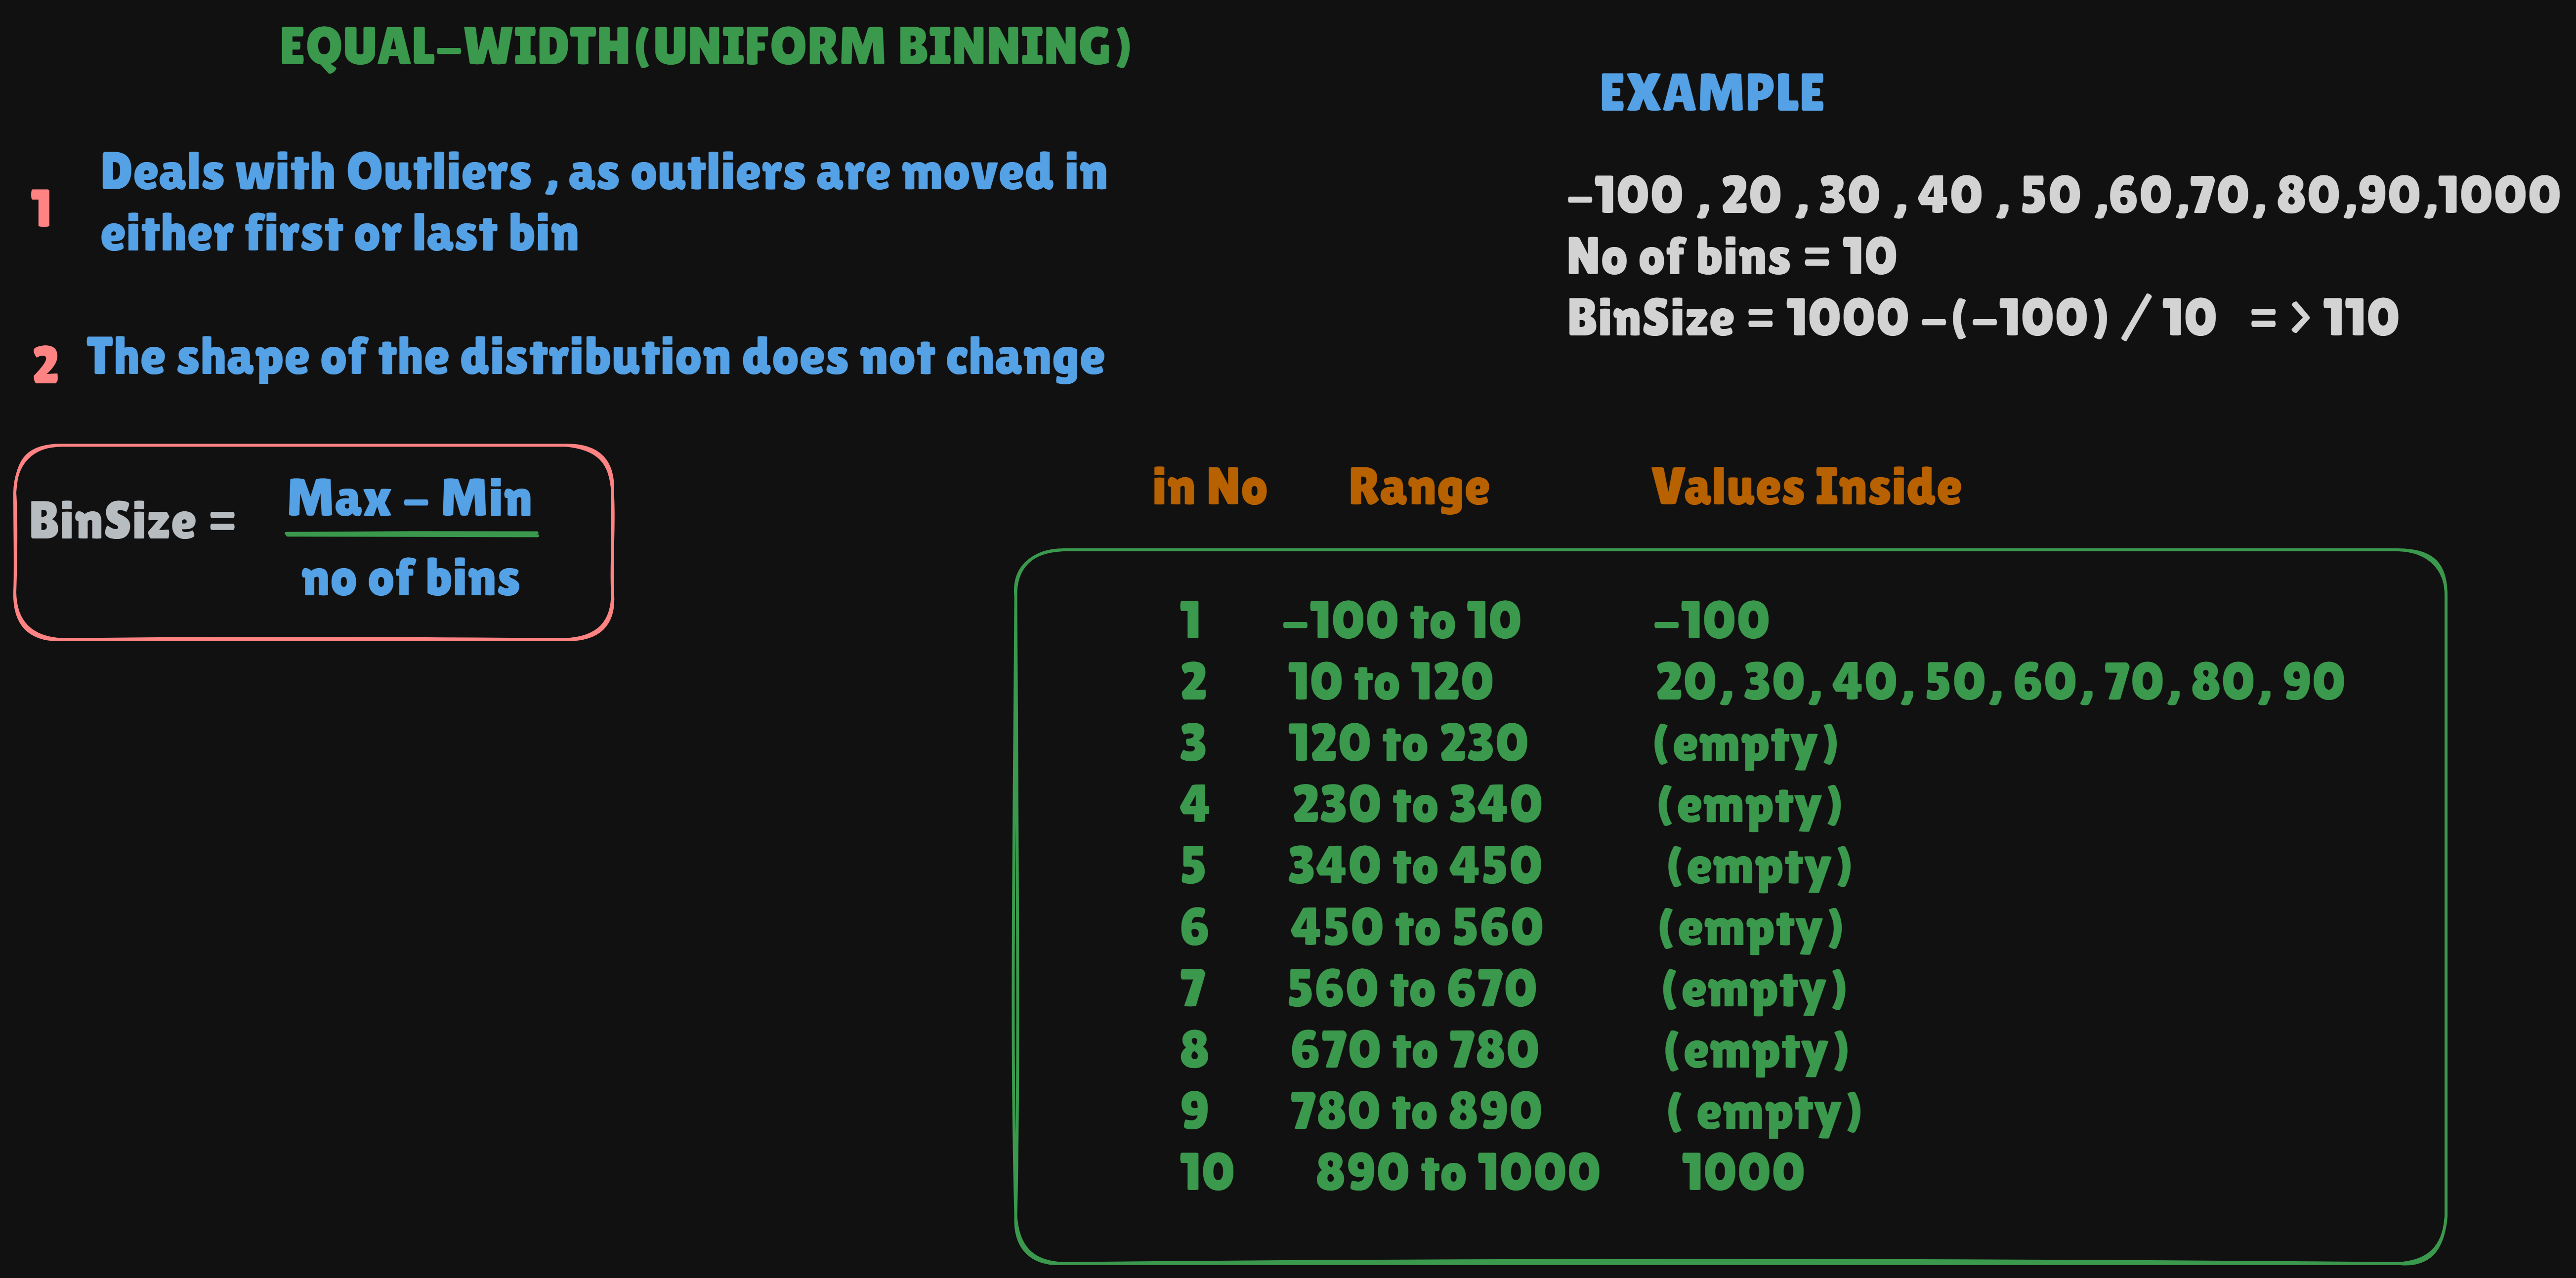

✅ In most machine learning and data science libraries (like pandas, scikit-learn):
- Bins are usually left-inclusive and right-e-xclusive — that is:

- 0 ≤ value < 10 goes into first bin (0–10)

- 10 ≤ value < 20 goes into second bin (10–20)

- 🔵 So 10 belongs to second bin (10–20), not first bin

#FREQUENCY BINNING(QUANTILE BINNING)

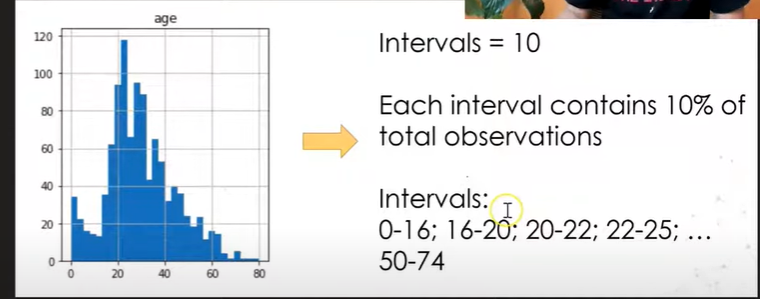

- You select No of bins / Intervals
- Select the % of Observation to be in each bin
- Example : 10% , then calcualte 10 , 20 , 30 ... quantiles
- Place 0-10 quantile data in first bin , 10 - 20 quantile data in 2 and so on

**ADVANTAGES**

- It works good on outliers like uniorm
- It makes the spread of data unifrom , unlike equal width which does not


#**K-MEANS BINNING**
-bins are formed on basis of k-mean cluster algo
- Used when your data has clusters/ranges

In [ ]:
# 1. n_bins (default=5)
# Description: This parameter specifies the number of bins (or intervals) to divide your data into.

# Example: If you set n_bins=4, it will create 4 bins based on quantiles (in this case, quartiles).

# Valid Values: Any integer greater than 1.

# 2. encode (default='onehot')
# Description: This determines the output format of the discretized values.

# Options:

# 'ordinal': The output will be the bin index (starting from 0) for each data point.

# 'onehot': The output will be a one-hot encoded matrix where each bin is represented by a binary vector.

# 'onehot-dense': Similar to 'onehot', but the matrix will be dense (no sparse representation).

# Example: If you set encode='ordinal', the output will be the bin number (e.g., 0, 1, 2, etc.) for each data point.

# 3. strategy (default='uniform')
# Description: This parameter controls how the bins are created.

# Options:

# 'uniform': The bins have equal width; they span the same range of values, regardless of data distribution.

# 'quantile': The bins will contain an equal number of data points in each bin. Bins are determined by percentiles.

# 'kmeans': The bins are created based on the k-means clustering algorithm. This results in bins with roughly equal variance.

# Example: If you set strategy='quantile', the bins will be created so that each bin contains the same number of data points.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:
data = np.random.randn(1000, 1) * 20 + 50  # 1000 samples, normally distributed data with mean=50, std=20

# Create a DataFrame to store the data
df = pd.DataFrame(data, columns=['value'])



In [ ]:
kbd  = KBinsDiscretizer(n_bins = 10 , strategy = "uniform" , encode = "ordinal")

In [ ]:
df["bin_coded"] = kbd.fit_transform(df['value'].values.reshape(-1,1))

In [ ]:
kbd.n_bins
kbd.encode
kbd.strategy
kbd.bin_edges_


array([array([-14.94865438,  -1.74198109,  11.4646922 ,  24.67136549,
               37.87803878,  51.08471207,  64.29138536,  77.49805865,
               90.70473194, 103.91140523, 117.11807852])             ],
      dtype=object)

**CUSTOM BIN BINNING**

- In this you make bins according to your domian knowdedge
- You do this using pandas
 - Skt learn dont have option for this

 - Example
 - 0-15 : kid
 - 16 - 30 : yound
 - 31 - : old

# **Binarization**
 - Binning : converting continous data into discrete data
 - Biniarization : Converting continous data into binary data
- it is a Case of discretization

- It means converting data into two categories, typically 0 and 1.

- You usually apply a threshold to decide:

- If a value is above the threshold → assign 1

- If a value is below the threshold → assign 0
- It is used in image processing
- Not used much , only used in specfic places


In [ ]:
import numpy as np
import pandas as pd

# Generate even and odd data
even_data = np.arange(2, 201, 2)  # Even numbers from 2 to 200
odd_data = np.arange(1, 200, 2)   # Odd numbers from 1 to 199

# Combine the even and odd data into a single dataset
combined_data = np.concatenate([even_data, odd_data])

# Create a pandas DataFrame
df = pd.DataFrame(combined_data, columns=['value'])

# Display the first few rows of the DataFrame


In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
B = Binarizer(  threshold = 50 ,  copy = True)


In [ ]:
df['binary '] = B.fit_transform(df['value'].values.reshape(-1,1))
# Any value greater than or equal to the threshold (50 in this case) will be set to 1.

# Any value less than the threshold will be set to 0.

In [ ]:
df

,value,binary
0,2,0
1,4,0
2,6,0
3,8,0
4,10,0
...,...,...
195,191,1
196,193,1
197,195,1
198,197,1
